In [32]:
import numpy as numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [71]:
# Генерируем выборку из стандартного нормального распределения
N = 100
sample = numpy.random.normal(0, 1, N)

In [72]:
# Функция строящая график зависимости абсолютной величины отклонения оценок estimations
# от реального значения параметра real_value в зависимости от размера подвыборки.
def demonstrate_estimations(estimations, real_value, ylim):
    # Инициализация
    dif = [0] * len(estimations)
    for i in range(len(estimations)):
        dif[i] = np.zeros(N)

    # Подсчет модуля разности для n < N
    for n in range(1, N + 1):
        for i in range(len(estimations)):
            dif[i][n - 1] = abs(estimations[i][0](sample[:n]) - real_value)

    # Строим основной график
    plt.figure(figsize=(16, 6))
    plt.title(r'$\theta = ' + str(real_value) + '$')

    grid = np.arange(1, N + 1, 1)
    for i in range(len(estimations)):
        plt.plot(grid, dif[i], label=estimations[i][1])

    plt.legend()
    plt.ylim(ylim[0], ylim[1])
    prop={'size':25}
    plt.show()

<h3>В модели $ N(\theta, 1) $ найдем оценку максимального правдоподобия и 4 байесовских оценки.</h3>

Сопряженное распределение - нормальное $N(a_0, \sigma^2_0)$ 

В таком случае $\overline X$ это оценка максимального правдоподобия параметра $ \theta $.

Рассмотрим различные значения параметров априрорного распределения: (0;1), (0; 100), (10;1), (10; 100).

In [73]:
# Функция рассчета байесовской оценки для подвыборки в зависимости от параметров априорного распределения
def bayes_estimator1(a, sigma, sample):
    return (a / sigma + numpy.sum(sample)) / (1 / sigma + len(sample))

# Вспомогательная функция генерации label для графика
def generate_label1(a, sigma):
    return r'$N(' + str(a) + '; ' + str(sigma) + ')$'

# Для удобства составим список исследуемых оценок
estimations1 = [((lambda x: np.mean(x)),                  r'$\overline{X}$'),
               ((lambda x: bayes_estimator1(0, 1, x)),    generate_label1(0, 1)),
               ((lambda x: bayes_estimator1(0, 100, x)),  generate_label1(0, 100)),
               ((lambda x: bayes_estimator1(10, 1, x)),   generate_label1(10, 1)),
               ((lambda x: bayes_estimator1(10, 100, x)), generate_label1(10, 100))]

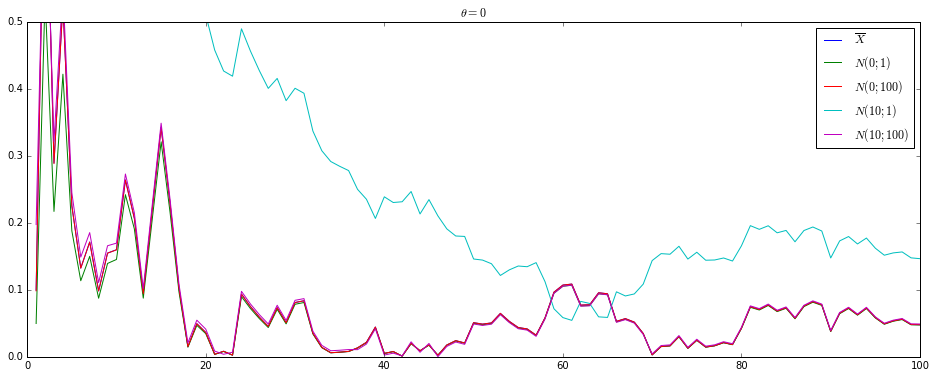

In [74]:
demonstrate_estimations(estimations1, real_value=0, ylim=(0, 0.5))

Как видно из построенного графика, лучшая оценка получается при априорном распределении $N(0, 1)$.

<h3>В модели $ N(0, \theta) $ найдем оценку максимального правдоподобия и 4 байесовских оценки</h3>

Сопряженное распределение - $Inv-Gamma(\alpha_0, \beta_0)$, байесовская оценка $\frac{\beta_0+\Sigma X_i^2}{\alpha_0+\frac{n}{2} - 1}$

$\overline {X^2}$ оценка максимального правдоподобия параметра $ \theta $.

Рассмотрим различные значения параметров априрорного распределения: (1;1), (1; 100), (10;1), (10; 100).

In [75]:
# Функция рассчета байесовской оценки для подвыборки в зависимости от параметров априорного распределения
def bayes_estimator2(alpha, beta, sample):
    return (beta + numpy.sum(sample ** 2)) / (alpha  + len(sample) / 2 - 1)

# Вспомогательная функция генерации label для графика
def generate_label2(a, sigma):
    return r'$Inv-Gamma(' + str(a) + '; ' + str(sigma) + ')$'

# Для удобства составим список исследуемых оценок
estimations2 = [((lambda x: np.mean(x**2)),               r'$\overline{X^2}$'),
               ((lambda x: bayes_estimator2(1, 1, x)),    generate_label2(1, 1)),
               ((lambda x: bayes_estimator2(1, 100, x)),  generate_label2(1, 100)),
               ((lambda x: bayes_estimator2(10, 1, x)),   generate_label2(10, 1)),
               ((lambda x: bayes_estimator2(10, 100, x)), generate_label2(10, 100))]


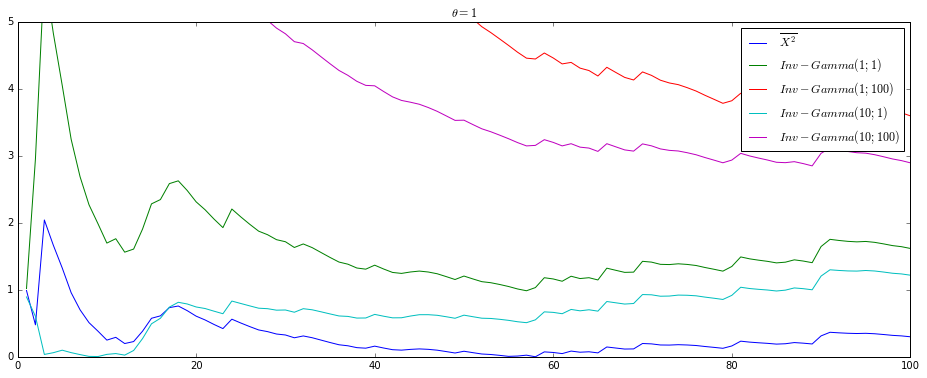

In [76]:
demonstrate_estimations(estimations2, real_value=1, ylim=(0, 5))

Как видно из построенного графика, лучшая оценка для $\theta$ получается при априорном распределении $Inv-Gamma(10, 1)$. Однако эта оценка все же хуже оценки максимального правдоподобия $\overline{X^2}$